In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Salary_Data_Cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Min Salary,Max Salary,Avg Salary,Job State,Company Age,Python Job,R-Studio Job,Spark Job,AWS Job,Excel Job
0,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",10000+ Employees,1936,Subsidiary or Business Segment,Insurance Carriers,...,104,170,137.0,MD,85,1,0,0,0,1
1,"Scientist, Clinical Data Manager",$30K - $55K (Glassdoor est.),Job Number: 29829\n\nReynolds American Incorpo...,4.3,British American Tobacco\n4.3,"Winston-Salem, NC",10000+ Employees,1902,Company - Public,Consumer Products Manufacturing,...,30,55,42.5,NC,119,0,0,0,0,1
2,Scientist,$51K - $108K (Glassdoor est.),Classification:\nSalary\nJob Description:\nAre...,3.5,Laticrete International\n3.5,"Grand Prairie, TX",201 to 500 Employees,-1,Company - Private,Chemical Manufacturing,...,51,108,79.5,TX,-1,0,0,0,0,1
3,Scientist - R&D ASC,$40K - $65K (Glassdoor est.),Job Number: 31115\n\nReynolds American Incorpo...,4.3,British American Tobacco\n4.3,"Memphis, TN",10000+ Employees,1902,Company - Public,Consumer Products Manufacturing,...,40,65,52.5,TN,119,0,0,0,0,1
4,Operations Data Analyst,$36K - $62K (Glassdoor est.),Make your mark. With more than $17.2 billion o...,4.0,Plante Moran\n4.0,"Kalamazoo, MI",1001 to 5000 Employees,1924,Company - Private,Accounting,...,36,62,49.0,MI,97,0,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Hourly',
       'Salary Employer Provided', 'Company Text', 'Min Salary', 'Max Salary',
       'Avg Salary', 'Job State', 'Company Age', 'Python Job', 'R-Studio Job',
       'Spark Job', 'AWS Job', 'Excel Job'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

        

In [6]:
df['Job Simplifier'] = df['Job Title'].apply(title_simplifier)
df['Job Simplifier'].value_counts()

na                18
data scientist    12
analyst            6
data engineer      2
manager            1
Name: Job Simplifier, dtype: int64

In [7]:
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

na        30
senior     9
Name: Seniority, dtype: int64

In [8]:
df['Job State']

0      MD
1      NC
2      TX
3      TN
4      MI
5      NY
6      MA
7      NC
8      MO
9      MA
10     NJ
11     VA
12     NC
13     WI
14     NJ
15     DC
16     TX
17     MA
18     NC
19     FL
20     CA
21     NC
22     IA
23     VA
24     MD
25     GA
26     OH
27     IL
28     FL
29     NC
30     IL
31     TN
32     IL
33     MI
34     MA
35     TN
36     GA
37     MA
38     VA
Name: Job State, dtype: object

In [9]:
# Fix state Los Angeles

# df['Job State'] = df['Job State'].apply(lambda x: x.strip() if x.strip.lower() != 'los angeles' else 'CA')
# df['Job State'].value_counts()
#df.drop('job_state', inplace = True, axis = 1)

In [10]:
# Job Description Length

df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))
df['Desc Length']

0     5214
1     6220
2     5288
3     6965
4     2727
5     5338
6     6252
7     5985
8     3036
9     3074
10    2954
11    4768
12    5740
13    2864
14    2931
15    5368
16    3677
17    3527
18    3841
19    2364
20    5928
21    6288
22    2563
23    6386
24    3044
25    4980
26    2686
27    2464
28    2625
29    3136
30    6727
31    3744
32    3871
33    4532
34    4616
35    4330
36    6320
37    3077
38    5524
Name: Desc Length, dtype: int64

In [11]:
# Competitors Count

# df['Nun Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
# df['Nun Competitors']

In [12]:
# df['Competitors']

In [13]:
# Hourly wage to annual

df['Min Salary'] = df.apply(lambda x: x['Min Salary']*2 if x['Salary Hourly'] == 1 else x['Min Salary'], axis = 1)
df['Max Salary'] = df.apply(lambda x: x['Max Salary']*2 if x['Salary Hourly'] == 1 else x['Max Salary'], axis = 1)

In [14]:
df['Min Salary']

0     104
1      30
2      51
3      40
4      36
5      35
6      88
7      53
8      41
9      60
10     73
11     46
12     49
13     65
14     45
15     47
16     59
17     37
18     34
19     70
20     47
21     56
22     72
23     33
24     76
25     77
26     40
27     94
28     79
29     40
30     42
31     83
32     32
33     60
34     34
35     35
36    101
37     71
38     78
Name: Min Salary, dtype: int64

In [15]:
df['Max Salary']

0     170
1      55
2     108
3      65
4      62
5      64
6     144
7     108
8      91
9     104
10    124
11     96
12    102
13     79
14     70
15     94
16     99
17     66
18     64
19    115
20     91
21    112
22    136
23     62
24    111
25    127
26     71
27    155
28    133
29     86
30     58
31    135
32     75
33    122
34     64
35     59
36    162
37    122
38    129
Name: Max Salary, dtype: int64

In [16]:
df['Salary Hourly']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
Name: Salary Hourly, dtype: int64

In [17]:
df[df['Salary Hourly'] == 1][['Salary Hourly', 'Min Salary', 'Avg Salary', 'Max Salary']]

,Salary Hourly,Min Salary,Avg Salary,Max Salary
30,1,42,25.0,58


In [18]:
df[df['Salary Hourly'] == 0][['Salary Hourly', 'Min Salary', 'Avg Salary', 'Max Salary']]

,Salary Hourly,Min Salary,Avg Salary,Max Salary
0,0,104,137.0,170
1,0,30,42.5,55
2,0,51,79.5,108
3,0,40,52.5,65
4,0,36,49.0,62
5,0,35,49.5,64
6,0,88,116.0,144
7,0,53,80.5,108
8,0,41,66.0,91
9,0,60,82.0,104


In [19]:
df['Company Text'] = df['Company Text'].apply(lambda x: x.replace('\n', ''))

In [20]:
df['Company Text']

0                                         GEICO
1                      British American Tobacco
2                       Laticrete International
3                      British American Tobacco
4                                  Plante Moran
5                        Amneal Pharmaceuticals
6                   The Hanover Insurance Group
7                      British American Tobacco
8                              EAG Laboratories
9                          Fidelity Investments
10                            Burlington Stores
11              Virginia Dept of Transportation
12                     British American Tobacco
13                                        Uline
14                                         PS&S
15    U.S. Agency for International Development
16               Cognizant Technology Solutions
17                     Barnes & Noble Education
18                                    TrialCard
19                                   Lee Health
20                         Quick Quack C

In [21]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n4. ', ''))

In [22]:
df['Company Name']

0                                         GEICO\n3.5
1                      British American Tobacco\n4.3
2                       Laticrete International\n3.5
3                      British American Tobacco\n4.3
4                                  Plante Moran\n4.0
5                        Amneal Pharmaceuticals\n3.4
6                   The Hanover Insurance Group\n4.1
7                      British American Tobacco\n4.3
8                              EAG Laboratories\n3.6
9                          Fidelity Investments\n4.1
10                            Burlington Stores\n3.2
11              Virginia Dept of Transportation\n3.9
12                     British American Tobacco\n4.3
13                                        Uline\n3.6
14                                         PS&S\n2.9
15    U.S. Agency for International Development\n3.9
16               Cognizant Technology Solutions\n3.7
17                     Barnes & Noble Education\n3.5
18                                    TrialCar

In [23]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Job State,Company Age,Python Job,R-Studio Job,Spark Job,AWS Job,Excel Job,Job Simplifier,Seniority,Desc Length
0,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",10000+ Employees,1936,Subsidiary or Business Segment,Insurance Carriers,...,MD,85,1,0,0,0,1,data scientist,senior,5214
1,"Scientist, Clinical Data Manager",$30K - $55K (Glassdoor est.),Job Number: 29829\n\nReynolds American Incorpo...,4.3,British American Tobacco\n4.3,"Winston-Salem, NC",10000+ Employees,1902,Company - Public,Consumer Products Manufacturing,...,NC,119,0,0,0,0,1,manager,na,6220
2,Scientist,$51K - $108K (Glassdoor est.),Classification:\nSalary\nJob Description:\nAre...,3.5,Laticrete International\n3.5,"Grand Prairie, TX",201 to 500 Employees,-1,Company - Private,Chemical Manufacturing,...,TX,-1,0,0,0,0,1,na,na,5288
3,Scientist - R&D ASC,$40K - $65K (Glassdoor est.),Job Number: 31115\n\nReynolds American Incorpo...,4.3,British American Tobacco\n4.3,"Memphis, TN",10000+ Employees,1902,Company - Public,Consumer Products Manufacturing,...,TN,119,0,0,0,0,1,na,na,6965
4,Operations Data Analyst,$36K - $62K (Glassdoor est.),Make your mark. With more than $17.2 billion o...,4.0,Plante Moran\n4.0,"Kalamazoo, MI",1001 to 5000 Employees,1924,Company - Private,Accounting,...,MI,97,0,0,0,0,1,analyst,na,2727
5,"Scientist III, Quality Control",$35K - $64K (Glassdoor est.),The Scientist 3 - QC is responsible to perform...,3.4,Amneal Pharmaceuticals\n3.4,"Brookhaven, NY",5001 to 10000 Employees,2002,Company - Public,Biotech & Pharmaceuticals,...,NY,19,0,0,0,0,0,na,na,5338
6,"AVP, Data Science for Personal Lines",$88K - $144K (Glassdoor est.),"AVP, Data Science for Personal Lines\nWorceste...",4.1,The Hanover Insurance Group\n4.1,"Worcester, MA",5001 to 10000 Employees,1852,Company - Public,Insurance Carriers,...,MA,169,0,0,0,0,0,na,na,6252
7,"Sr Scientist, Product Data Management",$53K - $108K (Glassdoor est.),Job Number: 31636\n\nReynolds American Incorpo...,4.3,British American Tobacco\n4.3,"Winston-Salem, NC",10000+ Employees,1902,Company - Public,Consumer Products Manufacturing,...,NC,119,0,0,0,0,1,na,senior,5985
8,Scientist,$41K - $91K (Glassdoor est.),Company Description\n\nEAG Laboratories is a g...,3.6,EAG Laboratories\n3.6,"Saint Louis, MO",501 to 1000 Employees,1978,Subsidiary or Business Segment,Research & Development,...,MO,43,0,0,0,0,1,na,na,3036
9,Senior Data Scientist,$60K - $104K (Glassdoor est.),Job Description:\nAt Fidelity’s Artificial Int...,4.1,Fidelity Investments\n4.1,"Boston, MA",10000+ Employees,1946,Company - Private,Investment Banking & Asset Management,...,MA,75,1,0,0,0,1,data scientist,senior,3074


In [24]:
df.describe()

,Rating,Founded,Salary Hourly,Salary Employer Provided,Min Salary,Max Salary,Avg Salary,Company Age,Python Job,R-Studio Job,Spark Job,AWS Job,Excel Job,Desc Length
count,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000
mean,3.797436,1802.384615,0.025641,0.0,56.743590,99.743590,77.602564,63.000000,0.307692,0.0,0.025641,0.153846,0.692308,4383.948718
std,0.403594,528.807179,0.160128,0.0,20.833574,31.998946,27.050922,42.883563,0.467572,0.0,0.160128,0.365518,0.467572,1446.528329
min,2.900000,-1.000000,0.000000,0.0,30.000000,55.000000,25.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2364.000000
25%,3.550000,1908.500000,0.000000,0.0,40.000000,68.000000,53.000000,23.500000,0.000000,0.0,0.000000,0.000000,0.000000,3040.000000
50%,3.800000,1946.000000,0.000000,0.0,51.000000,99.000000,75.500000,59.000000,0.000000,0.0,0.000000,0.000000,1.000000,4330.000000
75%,4.100000,1979.000000,0.000000,0.0,72.500000,123.000000,97.500000,100.000000,1.000000,0.0,0.000000,0.000000,1.000000,5632.000000
max,4.500000,2014.000000,1.000000,0.0,104.000000,170.000000,137.000000,169.000000,1.000000,0.0,1.000000,1.000000,1.000000,6965.000000


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Hourly',
       'Salary Employer Provided', 'Company Text', 'Min Salary', 'Max Salary',
       'Avg Salary', 'Job State', 'Company Age', 'Python Job', 'R-Studio Job',
       'Spark Job', 'AWS Job', 'Excel Job', 'Job Simplifier', 'Seniority',
       'Desc Length'],
      dtype='object')

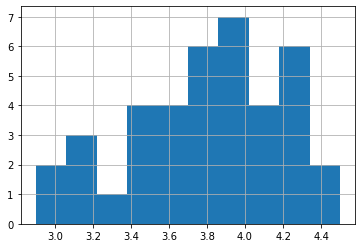

In [26]:
df.Rating.hist();

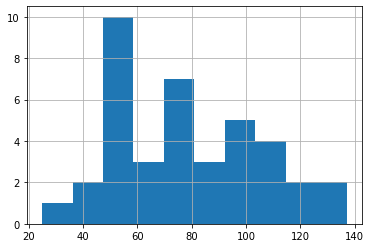

In [27]:
df['Avg Salary'].hist();

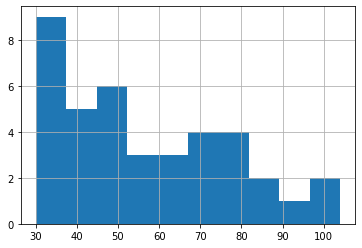

In [28]:
df['Min Salary'].hist();

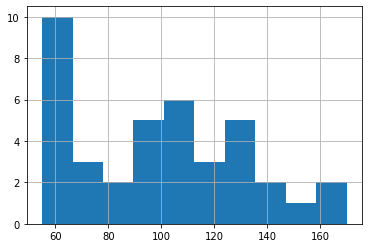

In [29]:
df['Max Salary'].hist();

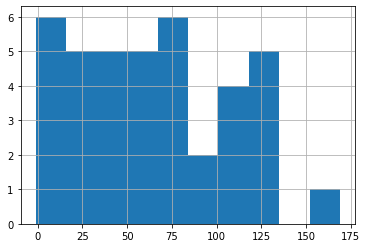

In [30]:
df['Company Age'].hist();

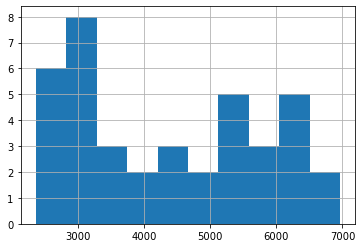

In [31]:
df['Desc Length'].hist()

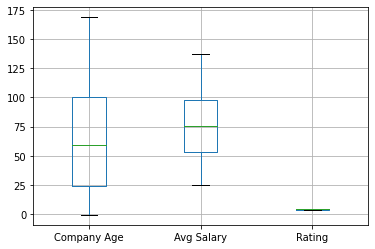

In [32]:
df.boxplot(column = ['Company Age', 'Avg Salary', 'Rating']);

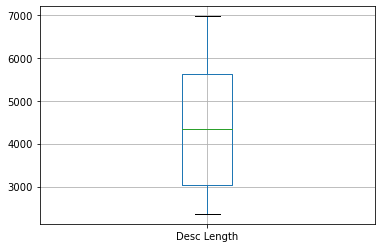

In [33]:
df.boxplot(column = 'Desc Length');

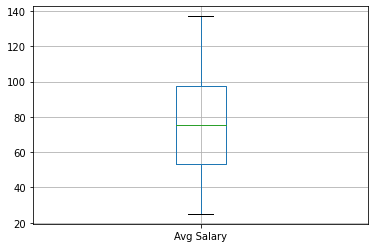

In [34]:
df.boxplot(column = 'Avg Salary');

In [35]:
df[['Company Age', 'Avg Salary', 'Rating', 'Desc Length']].corr();

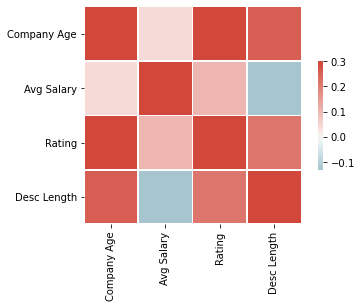

In [36]:
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(df[['Company Age', 'Avg Salary', 'Rating', 'Desc Length']].corr(), cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink':.5});

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Hourly',
       'Salary Employer Provided', 'Company Text', 'Min Salary', 'Max Salary',
       'Avg Salary', 'Job State', 'Company Age', 'Python Job', 'R-Studio Job',
       'Spark Job', 'AWS Job', 'Excel Job', 'Job Simplifier', 'Seniority',
       'Desc Length'],
      dtype='object')

In [38]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Text', 'Job State', 'Python Job', 'R-Studio Job',
   'Spark Job', 'AWS Job', 'Excel Job', 'Job Simplifier', 'Seniority']]

Graph for Location: Total = 31


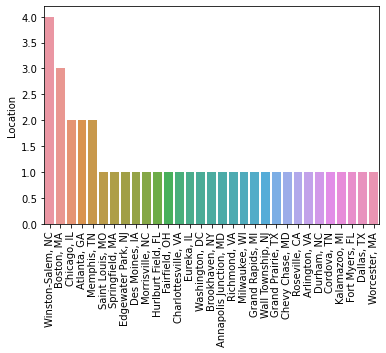

Graph for Size: Total = 6


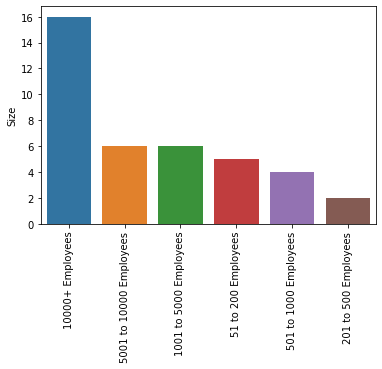

Graph for Type of ownership: Total = 6


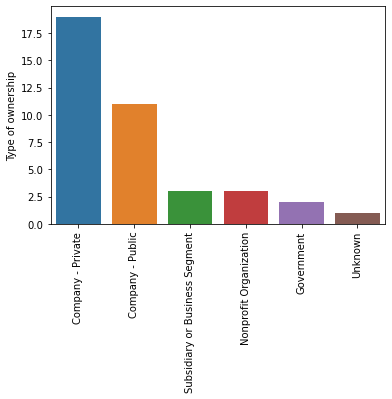

Graph for Industry: Total = 24


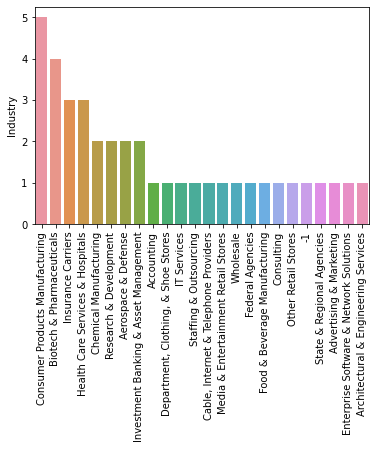

Graph for Sector: Total = 13


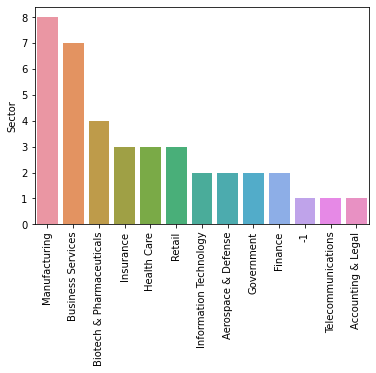

Graph for Revenue: Total = 10


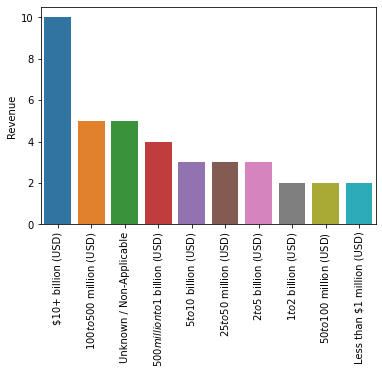

Graph for Company Text: Total = 34


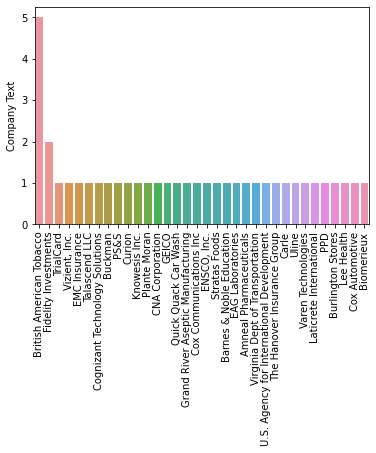

Graph for Job State: Total = 18


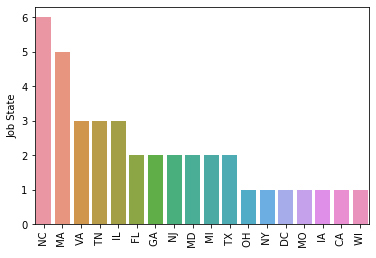

Graph for Python Job: Total = 2


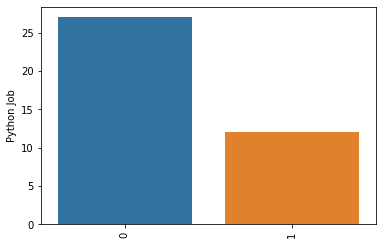

Graph for R-Studio Job: Total = 1


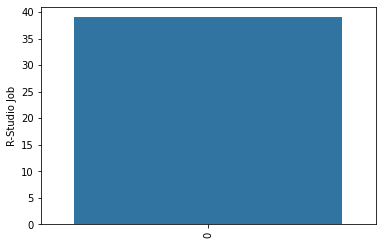

Graph for Spark Job: Total = 2


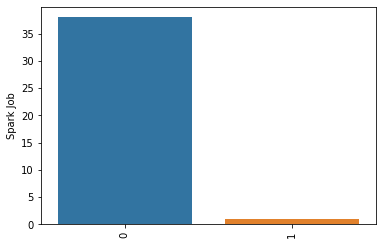

Graph for AWS Job: Total = 2


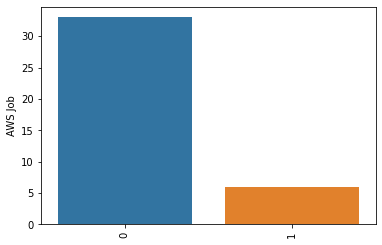

Graph for Excel Job: Total = 2


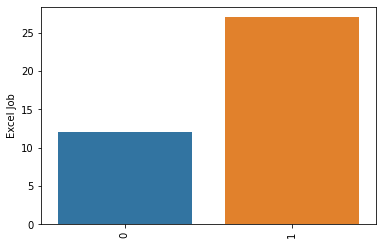

Graph for Job Simplifier: Total = 5


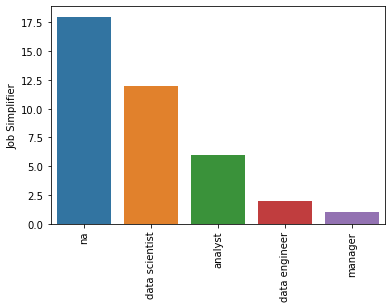

Graph for Seniority: Total = 2


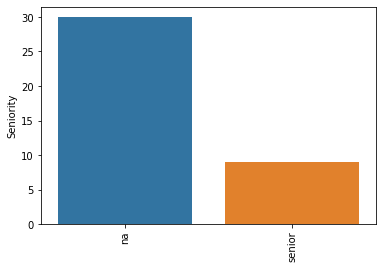

In [39]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


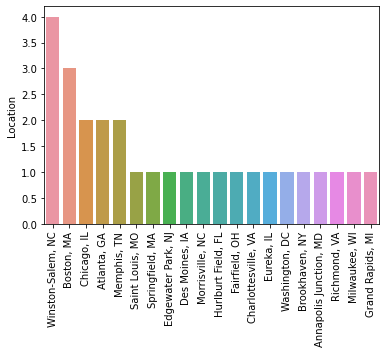

Graph for Company Text: Total = 20


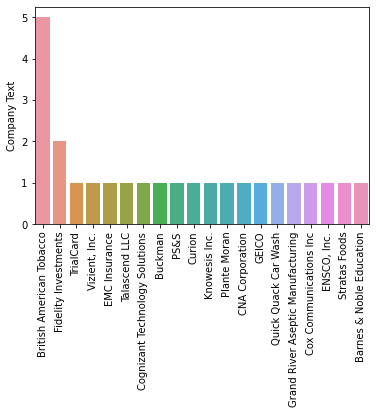

In [40]:
for i in df_cat[['Location', 'Company Text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: Total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
pd.pivot_table(df, index = 'Job Simplifier', values = 'Avg Salary')

,Avg Salary
Job Simplifier,
analyst,63.416667
data engineer,86.500000
data scientist,104.333333
manager,42.500000
na,65.472222


In [42]:
pd.pivot_table(df, index = ['Job Simplifier', 'Seniority'], values = 'Avg Salary')

Avg Salary
Job Simplifier Seniority            
analyst        na          63.416667
data engineer  na          86.500000
data scientist na         100.428571
               senior     109.800000
manager        na          42.500000
na             na          60.535714
               senior      82.750000

In [43]:
pd.pivot_table(df, index = 'Job State', values = 'Avg Salary').sort_values('Avg Salary', ascending = False)

,Avg Salary
Job State,
GA,116.750000
MD,115.250000
IA,104.000000
FL,99.250000
TX,79.250000
MA,79.000000
NJ,78.000000
VA,74.000000
WI,72.000000


In [44]:
pd.pivot_table(df, index = ['Job State','Job Simplifier'], values = 'Avg Salary').sort_values('Job State', ascending = False)

Avg Salary
Job State Job Simplifier            
 WI       analyst              72.00
 VA       na                   59.25
          analyst             103.50
 TX       na                   79.50
          data scientist       79.00
 TN       na                   49.75
          data scientist      109.00
 OH       analyst              55.50
 NY       na                   49.50
 NJ       na                   57.50
          data scientist       98.50
 NC       manager              42.50
          na                   75.75
          analyst              49.00
 MO       na                   66.00
 MI       na                   91.00
          analyst              49.00
 MD       data scientist      115.25
 MA       na                   82.50
          data scientist       89.25
          analyst              51.50
 IL       na                   39.25
          data scientist      124.50
 IA       data engineer       104.00
 GA       data scientist      116.75
 FL       data scientist       99.25
 DC       na                   70.50
 CA       data engineer        69.00

In [45]:
pd.pivot_table(df, index = 'Job Simplifier', values = 'Avg Salary')

,Avg Salary
Job Simplifier,
analyst,63.416667
data engineer,86.500000
data scientist,104.333333
manager,42.500000
na,65.472222


In [46]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [47]:
pd.pivot_table(df, index = ['Job State', 'Job Simplifier'], values = 'Avg Salary').sort_values('Job State', ascending = False)

Avg Salary
Job State Job Simplifier            
 WI       analyst              72.00
 VA       na                   59.25
          analyst             103.50
 TX       na                   79.50
          data scientist       79.00
 TN       na                   49.75
          data scientist      109.00
 OH       analyst              55.50
 NY       na                   49.50
 NJ       na                   57.50
          data scientist       98.50
 NC       manager              42.50
          na                   75.75
          analyst              49.00
 MO       na                   66.00
 MI       na                   91.00
          analyst              49.00
 MD       data scientist      115.25
 MA       na                   82.50
          data scientist       89.25
          analyst              51.50
 IL       na                   39.25
          data scientist      124.50
 IA       data engineer       104.00
 GA       data scientist      116.75
 FL       data scientist       99.25
 DC       na                   70.50
 CA       data engineer        69.00

In [48]:
pd.pivot_table(df, index = ['Job State', 'Job Simplifier'], values = 'Avg Salary', aggfunc = 'count').sort_values('Job State', ascending = False)

Avg Salary
Job State Job Simplifier            
 WI       analyst                  1
 VA       na                       2
          analyst                  1
 TX       na                       1
          data scientist           1
 TN       na                       2
          data scientist           1
 OH       analyst                  1
 NY       na                       1
 NJ       na                       1
          data scientist           1
 NC       manager                  1
          na                       4
          analyst                  1
 MO       na                       1
 MI       na                       1
          analyst                  1
 MD       data scientist           2
 MA       na                       2
          data scientist           2
          analyst                  1
 IL       na                       2
          data scientist           1
 IA       data engineer            1
 GA       data scientist           2
 FL       data scientist           2
 DC       na                       1
 CA       data engineer            1

In [49]:
pd.pivot_table(df[df['Job Simplifier'] == 'data scientist'], index = 'Job State', values = 'Avg Salary').sort_values('Avg Salary', ascending = False)

,Avg Salary
Job State,
IL,124.50
GA,116.75
MD,115.25
TN,109.00
FL,99.25
NJ,98.50
MA,89.25
TX,79.00


In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Hourly',
       'Salary Employer Provided', 'Company Text', 'Min Salary', 'Max Salary',
       'Avg Salary', 'Job State', 'Company Age', 'Python Job', 'R-Studio Job',
       'Spark Job', 'AWS Job', 'Excel Job', 'Job Simplifier', 'Seniority',
       'Desc Length'],
      dtype='object')

In [50]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Salary Hourly', 'Salary Employer Provided', 'Python Job', 'R-Studio Job', 'Spark Job', 'AWS Job', 'Excel Job', 'Type of ownership', 'Avg Salary']]

In [51]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index = i, values = 'Avg Salary').sort_values(i, ascending = False))

Rating
        Avg Salary
Rating            
4.5     106.000000
4.4      63.000000
4.3      67.000000
4.2      93.500000
4.1     104.750000
4.0      42.500000
3.9      72.750000
3.8     106.500000
3.7      82.125000
3.6      80.375000
3.5      89.333333
3.4      49.500000
3.3     103.500000
3.2      67.000000
3.0      49.000000
2.9      57.500000
Industry
                                         Avg Salary
Industry                                           
Wholesale                                 72.000000
State & Regional Agencies                 71.000000
Staffing & Outsourcing                    55.500000
Research & Development                    59.750000
Other Retail Stores                       69.000000
Media & Entertainment Retail Stores       51.500000
Investment Banking & Asset Management     89.250000
Insurance Carriers                       119.000000
IT Services                              131.500000
Health Care Services & Hospitals          80.666667
Food & Beverage Ma

ValueError: Grouper for 'Avg Salary' not 1-dimensional

In [52]:
pd.pivot_table(df_pivot, index = 'Revenue', columns = 'Python Job', values = 'Avg Salary', aggfunc = 'count')

Python Job,0,1
Revenue,,
$1 to $2 billion (USD),2.0,NaN
$10+ billion (USD),6.0,4.0
$100 to $500 million (USD),3.0,2.0
$2 to $5 billion (USD),3.0,NaN
$25 to $50 million (USD),2.0,1.0
$5 to $10 billion (USD),2.0,1.0
$50 to $100 million (USD),2.0,NaN
$500 million to $1 billion (USD),2.0,2.0
Less than $1 million (USD),2.0,NaN


In [53]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
words = ' '.join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = ''.join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state=1, stopwords = STOPWORDS, max_words = 2000, width = 800, height=1500)
wc.generate(text) 

plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df